## Spring Mass System Analysis And Simulation

In this notebook I'll model spring mass system and simulate it in python.

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class Simulation:
    def __init__(self, spring_constant, mass, amplitude, initial_phase, simulation_time, time_step):
        self.k = spring_constant
        self.m = mass
        self.a = amplitude
        self.phi = initial_phase
        self.t = simulation_time
        self.dt = time_step
        self.n = round(self.t/self.dt)
        self.omega = np.sqrt(self.k/self.m)
        self.x = np.arange(0, self.t, self.dt)
        self.period = 2*np.pi/self.omega
    
#     def numerical_analysis(self, t, dt):
#         self.n = round(t/dt)
#         self.x = np.arange(0, t, dt)
#         self.omega = np.sqrt(self.k/self.m)  

    def calculate_position(self, t):
        position = self.a*np.sin(self.omega*t + self.phi)
        return position
    
    def velocity_at_spcific_time(self, t):
        velocity = self.a*self.omega*np.cos(self.omega*t + self.phi)
        return velocity
    
    def acceleration_at_spcific_time(self, t):
        acceleration = -self.a*np.square(self.omega)*np.sin(self.omega*t + self.phi)
        return acceleration
    
    
    
        
    def displacement_array(self):
        displacement = np.zeros_like(self.x)
        for i in range(self.n):
            displacement[i] = self.calculate_position(t=self.x[i])
        return displacement
            
        
    def velocity_array(self):
        velocity = np.zeros_like(self.x)
        for i in range(self.n):
            velocity[i] = self.velocity_at_spcific_time(t=self.x[i])
        return velocity
    
    def acceleration_array(self):
        acceleration = np.zeros_like(self.x)
        for i in range(self.n):
            acceleration[i] = self.acceleration_at_spcific_time(t=self.x[i])
        return acceleration

In [26]:
def plot_graph(x, y, t, T, color='blue', linewidth=1, title='', xlabel='', ylabel=''):
    fig, ax = plt.subplots()
    # Add horizontal and vertical lines at y=0 and x=0, respectively
    ax.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
    ax.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0
    ax.plot(x, y, color=color, linewidth=linewidth)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.set_xticks(np.arange(0, t, T))

    plt.show()

In [27]:
sim_1 = Simulation(spring_constant=50, mass=2, amplitude=0.5, initial_phase=0, simulation_time=3, time_step=0.01)

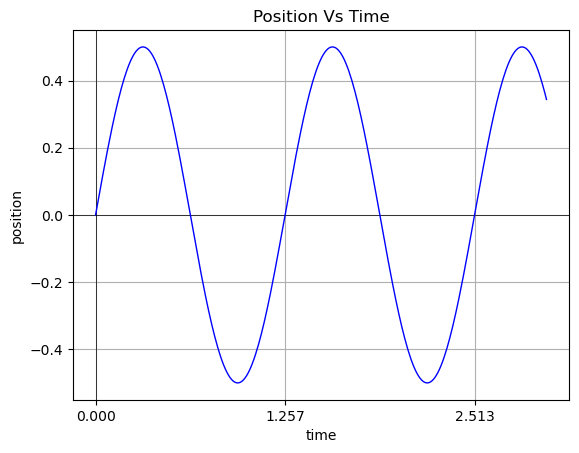

In [28]:
plot_graph(x=sim_1.x, y=sim_1.displacement_array(), t=sim_1.t, T=sim_1.period, title='Position Vs Time', xlabel='time', ylabel='position')

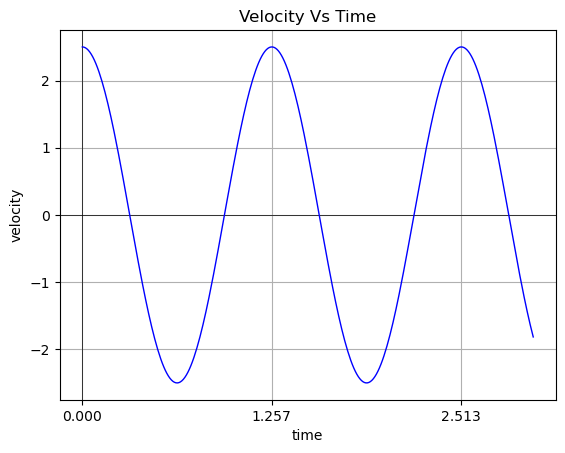

In [30]:
plot_graph(x=sim_1.x, y=sim_1.velocity_array(), t=sim_1.t, T=sim_1.period, title='Velocity Vs Time', xlabel='time', ylabel='velocity')